## Import Libraries

In [1]:
import cv2
import os
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Import Env File

In [2]:
from dotenv import load_dotenv  

load_dotenv()
datasets_path = os.getenv('AUGMENTED_PATH_JOGJA_PEKALONGAN')
# datasets_path = os.getenv('AUGMENTED_SMALL_PATH_JOGJA_PEKALONGAN')
models_path = os.getenv('MODELS_PATH')

In [3]:
os.listdir(datasets_path)

['jogja', 'pekalongan']

## Parameters

In [4]:
test_split_ratio = 0.2

## GLCM Function

In [5]:
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tambahkan jarak dan sudut yang bervariasi
    distances = [1, 2, 3]  # Jarak pixel: 1, 2, 3
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut: 0°, 45°, 90°, 135°

    # Hitung GLCM
    glcm = graycomatrix(gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Daftar fitur yang ingin diambil
    props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

    features = []

    # Ekstraksi setiap fitur dan flatten hasilnya
    for prop in props:
        prop_values = graycoprops(glcm, prop)  # shape = (len(distances), len(angles))
        features.extend(prop_values.flatten())

    return features

## Load The Dataset and Extract The Features

In [6]:
features = []
labels = []

for class_idx, class_name in enumerate(os.listdir(datasets_path)):
    folder = os.path.join(datasets_path, class_name)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tambahkan fitur dari gambar asli juga jika diinginkan
        glcm_features = extract_glcm_features(image)
        features.append(glcm_features)
        labels.append(class_idx)

features = np.array(features)
labels = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=test_split_ratio,
    random_state=42,
    stratify=labels  # Menjaga distribusi kelas tetap seimbang
)

In [8]:
# Melihat 10 baris pertama dari X_train
print("X_train sebelum normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sebelum normalisasi (10 baris pertama):
[[8.50524584e+02 1.56276171e+03 8.53164798e+02 1.58769547e+03
  2.58013320e+03 1.56276171e+03 2.59037283e+03 1.58769547e+03
  4.39501586e+03 4.32642117e+03 4.41533791e+03 4.42929385e+03
  1.61141896e+01 2.26791812e+01 1.61722053e+01 2.29531259e+01
  2.83807513e+01 2.26791812e+01 2.86095158e+01 2.29531259e+01
  3.88359931e+01 3.93379393e+01 3.91687136e+01 4.00437870e+01
  1.52415460e-01 1.10251250e-01 1.37953841e-01 1.08634711e-01
  1.07138908e-01 1.10251250e-01 9.55113468e-02 1.08634711e-01
  9.48926862e-02 8.68898345e-02 8.38127863e-02 8.51741934e-02
  2.25517318e-02 1.96370858e-02 2.17592513e-02 1.95932527e-02
  1.90010268e-02 1.96370858e-02 1.82473398e-02 1.95932527e-02
  1.73726565e-02 1.67468559e-02 1.65335146e-02 1.66801184e-02
  9.33352083e-01 8.77612028e-01 9.33294635e-01 8.75656438e-01
  7.97519816e-01 8.77612028e-01 7.97590282e-01 8.75656438e-01
  6.54529957e-01 6.60892597e-01 6.55139355e-01 6.52807509e-01]
 [5.71969311e+02 1.20

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        

In [10]:
# Melihat 10 baris pertama dari X_train
print("X_train sesudah normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sesudah normalisasi (10 baris pertama):
[[-4.45722780e-01 -2.04297164e-01 -2.39214625e-01 -2.18265640e-01
  -1.13011849e-01 -2.04297164e-01  1.59239348e-01 -2.18265640e-01
   2.11567990e-01  3.43308317e-01  5.18009960e-01  3.53681510e-01
  -5.79302834e-01 -2.96599708e-01 -3.21997985e-01 -3.16124448e-01
  -3.28954549e-01 -2.96599708e-01 -3.62364613e-02 -3.16124448e-01
  -2.48942378e-02  1.51680235e-01  2.82253539e-01  1.62807852e-01
  -1.19714111e-01 -4.47827562e-01 -3.82587214e-01 -4.58086964e-01
  -3.29258808e-01 -4.47827562e-01 -5.59879806e-01 -4.58086964e-01
  -3.36399022e-01 -4.56266734e-01 -5.60935760e-01 -4.71971582e-01
  -7.00269295e-01 -7.24004313e-01 -7.29446318e-01 -7.25289334e-01
  -7.13759532e-01 -7.24004313e-01 -7.37740274e-01 -7.25289334e-01
  -7.16774994e-01 -7.20727466e-01 -7.38417009e-01 -7.23691145e-01
   7.95818895e-01  7.36007244e-01  6.34476541e-01  7.65072636e-01
   7.66695651e-01  7.36007244e-01  5.28524212e-01  7.65072636e-01
   5.10609796e-01  3.9916651

In [14]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95) 
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (607, 60)
X_test shape: (152, 60)


In [12]:
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

Y_train shape: (607,)
Y_test shape: (152,)


In [18]:
# # Melihat 10 baris pertama dari X_train_pca
# print("X_train_pca (10 baris pertama):")
# print(X_train_pca[:10])

## Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Untuk kernel linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel RBF
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel poly
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3],
    'class_weight': [None]
}

# Gabungkan semua grid
param_grid = [param_grid_linear, param_grid_rbf, param_grid_poly]

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Fitting 5 folds for each of 188 candidates, totalling 940 fits
Best parameters: {'C': 10, 'class_weight': None, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True, 'tol': 0.001}
Best cross-validation score: 0.8138463622815337


## Model

In [14]:
from sklearn.svm import SVC

# Gunakan parameter terbaik dari GridSearchCV
# best_model = SVC(C=10, class_weight=None, gamma='auto', kernel='rbf', shrinking=True, tol=0.001)
best_model = SVC(C=10, class_weight=None, coef0=0.5 , degree=4, gamma='scale', kernel='poly', shrinking=True, tol=0.001)
best_model.fit(X_train, y_train)


SVC(C=10, coef0=0.5, degree=4, kernel='poly')

## Evaluates

In [15]:
# Evaluasi model
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.7631578947368421
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        75
           1       0.77      0.75      0.76        77

    accuracy                           0.76       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.76      0.76      0.76       152



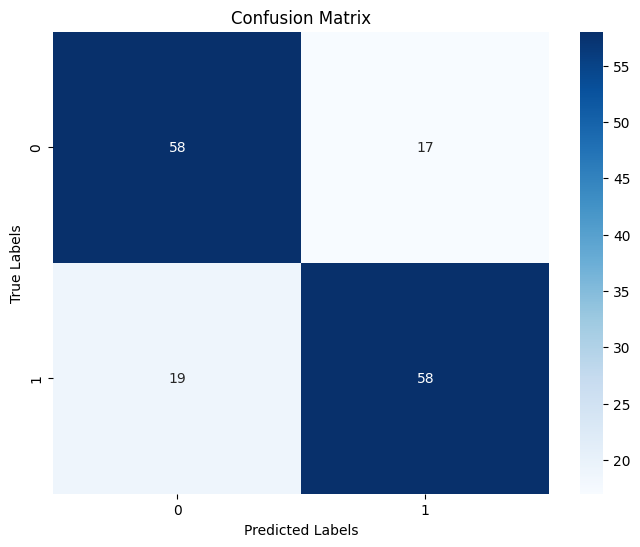

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Save The Model

In [18]:
from joblib import dump

# Simpan model ke file
dump(best_model, models_path+'/svm_glcm_model2.joblib')

['D:/Batik-Classifier-Model/Output/svm_glcm_model2.joblib']